<a href="https://colab.research.google.com/github/Matthenry1101/ChurnModel/blob/master/New_Version_Churn_Modeling_Team6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '19n2lvsNTEdddK0dqEx9woX3BhMKXYn5v'})
myfile.GetContentFile('file.csv')

In [0]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from scipy import stats
# read in data set
df = pd.read_csv('file.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.head()
df.shape
df.info()
df.describe()
df.head()
for col in df:
    print(col)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
Has

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Correlation Analysis**

In [0]:
# correlation matrix
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


(11.0, -2.0)

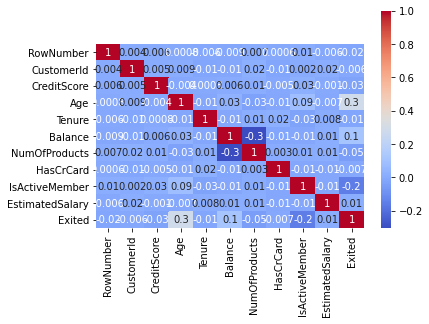

In [0]:
# Correlation Heatmap
ax=sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='coolwarm')
ax.get_ylim()
ax.set_ylim(11.0,-2.0)

In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


**Outlier Analysis**

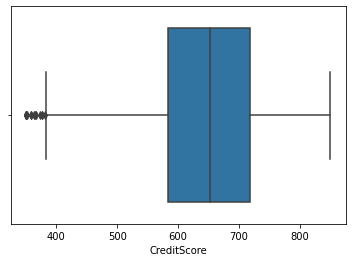

In [0]:
# Show Maxplot
sns.boxplot(x=df['CreditScore'])

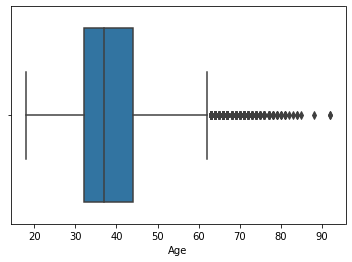

In [0]:
sns.boxplot(x=df['Age'])


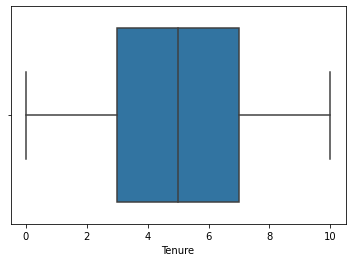

In [0]:
sns.boxplot(df['Tenure'])


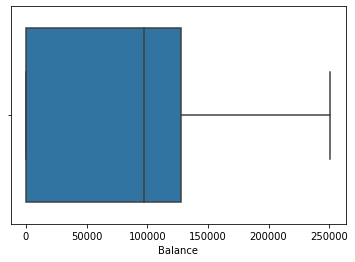

In [0]:
sns.boxplot(df['Balance'])

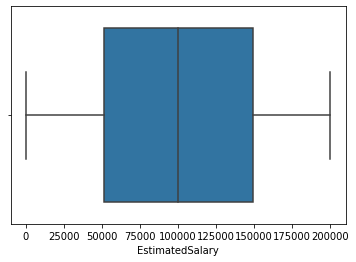

In [0]:
sns.boxplot(df['EstimatedSalary'])

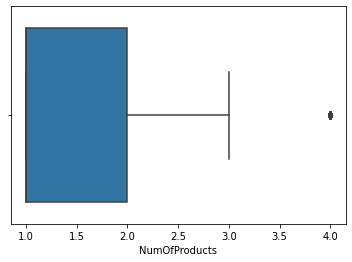

In [0]:
sns.boxplot(x=df['NumOfProducts'])

**Put multiple boxplots in one graph**

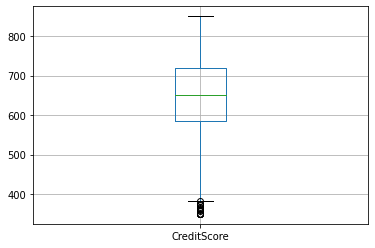

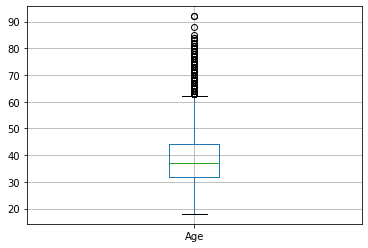

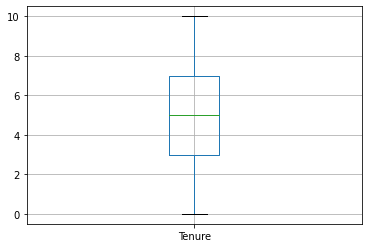

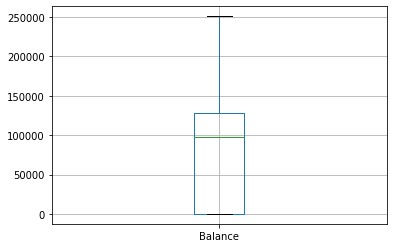

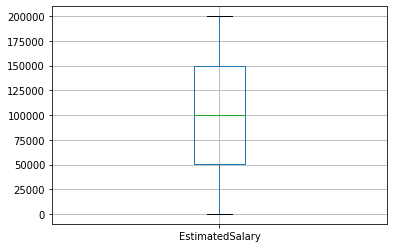

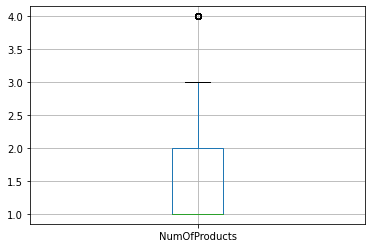

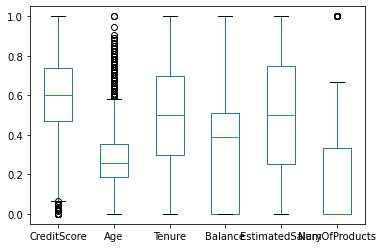

In [0]:
# put multiple boxplots in one graph
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_df=df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']]
numeric_scaled=pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)
numeric_scaled
import matplotlib.pyplot as plt
for column in numeric_scaled:
     plt.figure()
     df.boxplot([column])
numeric_scaled.plot(kind='box')

**Z-score method to detect and remove outliers**

*   List item
*   List item



In [0]:
numeric_df=df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']]
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(numeric_df))
print(z)
threshold=3
print(np.where(z>3))

[[0.32622142 0.29351742 1.04175968 1.22584767 0.02188649 0.91158349]
 [0.44003595 0.19816383 1.38753759 0.11735002 0.21653375 0.91158349]
 [1.53679418 0.29351742 1.03290776 1.33305335 0.2406869  2.52705662]
 ...
 [0.60498839 0.27860412 0.68712986 1.22584767 1.00864308 0.91158349]
 [1.25683526 0.29351742 0.69598177 0.02260751 0.12523071 0.80773656]
 [1.46377078 1.04143285 0.35020386 0.85996499 1.07636976 0.91158349]]
(array([   7,   70,   85,  158,  230,  252,  310,  371,  602,  766,  888,
       1009, 1039, 1055, 1205, 1254, 1342, 1405, 1410, 1469, 1488, 1614,
       1631, 1701, 1790, 1838, 1876, 1933, 1962, 2002, 2012, 2108, 2124,
       2159, 2164, 2196, 2285, 2433, 2458, 2462, 2473, 2499, 2509, 2541,
       2553, 2614, 2617, 2772, 2778, 2855, 2872, 2901, 2925, 3033, 3110,
       3142, 3152, 3311, 3317, 3365, 3366, 3378, 3382, 3387, 3396, 3499,
       3531, 3602, 3651, 3691, 3702, 3813, 3826, 3841, 3880, 3888, 3994,
       4013, 4014, 4162, 4166, 4256, 4260, 4273, 4318, 4366, 4378, 4

In [0]:
# remove outliers
df_nooutlier=df[(z<3).all(axis=1)]
print(df.shape)
print(df_nooutlier.shape)

(10000, 14)
(9799, 14)


**Visualizing with respect to Target Variable**

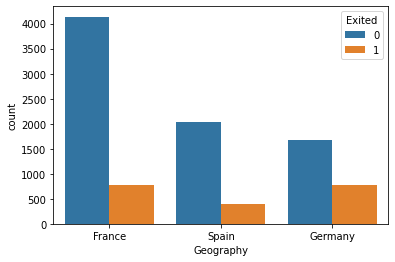

In [0]:
sns.countplot(x='Geography', hue = 'Exited',data = df_nooutlier)

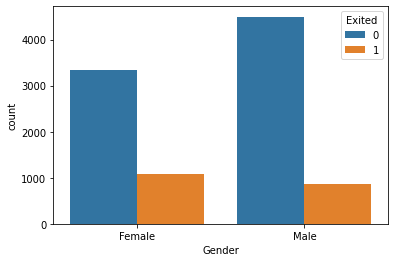

In [0]:
sns.countplot(x='Gender', hue = 'Exited',data = df_nooutlier)

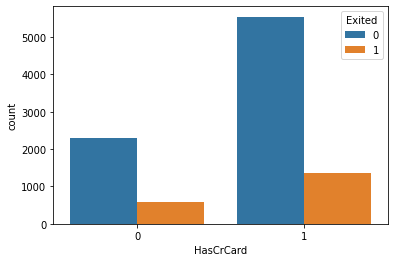

In [0]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df_nooutlier)

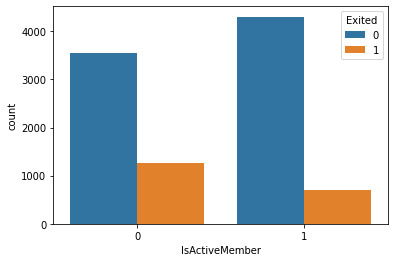

In [0]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df_nooutlier)

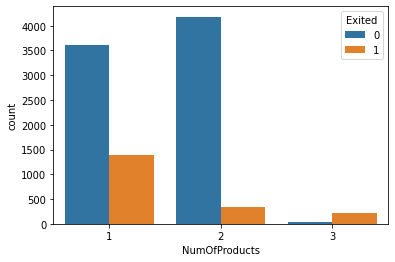

In [0]:
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df_nooutlier)

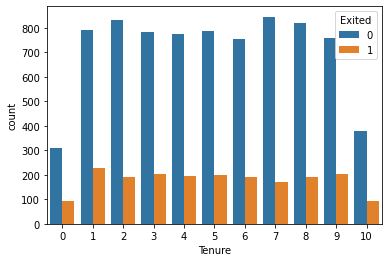

In [0]:
sns.countplot(x='Tenure', hue = 'Exited',data = df_nooutlier)

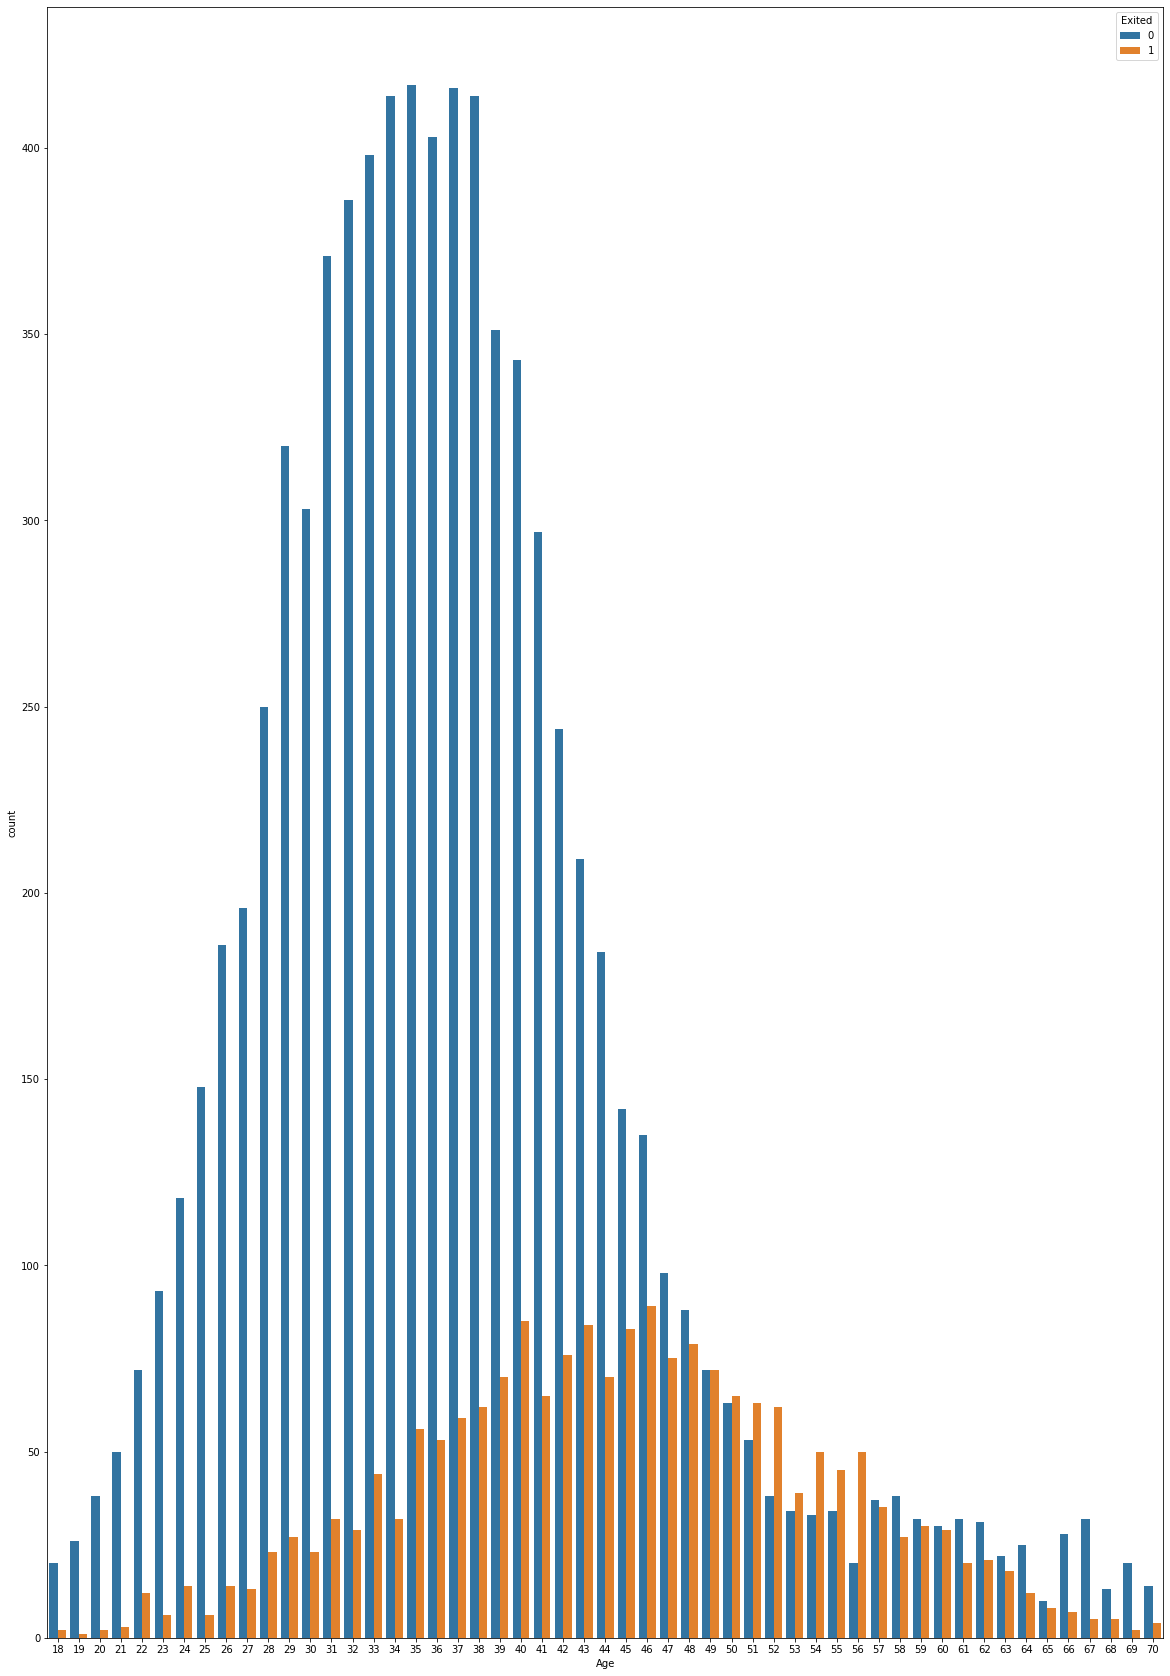

In [0]:
plt.figure(figsize=(20, 30))
sns.countplot(x='Age', hue = 'Exited', data = df_nooutlier)

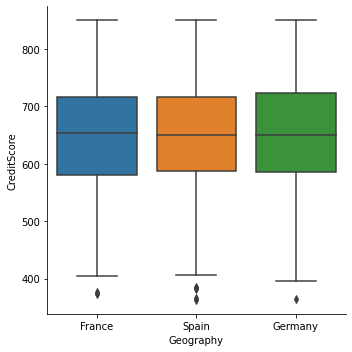

In [0]:
sns.catplot(x="Geography", y="CreditScore", kind="box", data= df_nooutlier)

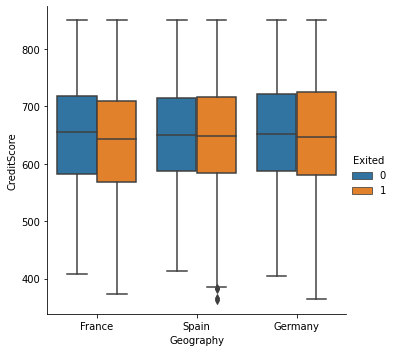

In [0]:
sns.catplot(x="Geography", y="CreditScore", hue="Exited", kind="box", data=df_nooutlier)

In [0]:
df_nooutlier.drop(['RowNumber','Surname'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df_nooutlier.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df_nooutlier.tail()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Visualization**

In [0]:
# set different data types apart
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [0]:
df.drop(['CustomerId'],axis=1,inplace=True)

In [0]:
categorical = [var for var in df.columns if df[var].dtypes == 'object']
categorical

['Geography', 'Gender']

In [0]:
# list numerical variable
numerical = [var for var in df.columns if df[var].dtypes != 'object']
numerical

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

8 ValueError


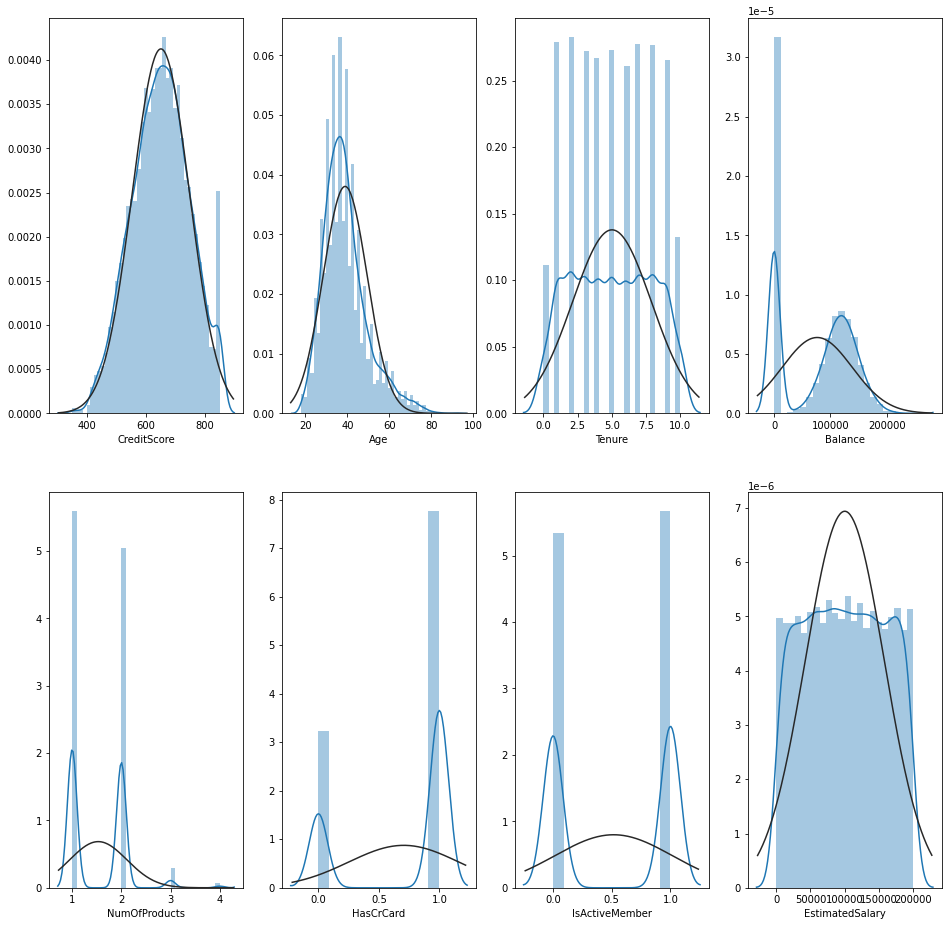

In [0]:
# Distribution plots for all numeric variables.
from scipy import stats
fig = plt.figure()
#plt.figure(figsize=(120,60))
i = 0
for col in numerical:
    try:
        ax = fig.add_subplot(2,4,i+1)
        sns.distplot(df[col], kde=True, fit=stats.norm)
    except ValueError:
        print(str(i)+ ' '+ 'ValueError')
    except RuntimeError:
        print(str(i)+ ' '+ 'RuntimeError')
    i = i+1
fig.set_size_inches(16,16)

ValueError: ignored

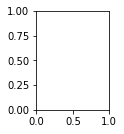

<Figure size 8640x4320 with 0 Axes>

In [0]:
# Boxplots for all numeric variables to Y
fig = plt.figure()
plt.figure(figsize=(120,60))
i = 1
for col in numerical:
    ax = fig.add_subplot(2,4,i)
    sns.boxplot(x = 'exited', y = col, data = df, ax = ax).set_title(col) 
    i = i+1
fig.set_size_inches(16, 16)

**Pre-Processing, Sampling**

In [0]:
# Pre-Processing
df_nooutlier.head()
X=df_nooutlier[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].values
y=df_nooutlier["Exited"]

##Sklearn do not handle categorical variables
from sklearn import preprocessing
le_Geography = preprocessing.LabelEncoder()
le_Geography.fit(['France','Spain','Germany'])
X[:,1] = le_Geography.transform(X[:,1]) 

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit([ 'Male','Female'])
X[:,2] = le_Gender.transform(X[:,2])

X[0:5]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]], dtype=object)

In [0]:
# Seperate data into training and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[0:5]

array([[-0.98133775, -0.90060186, -1.09342699,  1.36946293,  1.36365162,
        -1.2277887 , -0.9279024 ,  0.64723082, -1.02495033,  1.29621008],
       [ 0.11153038,  1.50955349, -1.09342699,  0.25008035, -0.01604178,
        -0.77924398, -0.9279024 ,  0.64723082, -1.02495033, -0.53566282],
       [ 1.18358197, -0.90060186,  0.9145558 ,  0.25008035,  0.67380492,
        -1.2277887 ,  0.88379204, -1.54504385, -1.02495033,  0.59737483],
       [-1.63705862, -0.90060186, -1.09342699, -0.25872991, -1.05081183,
        -1.2277887 ,  0.88379204, -1.54504385,  0.97565704, -0.01186809],
       [ 1.15235717,  0.30447581, -1.09342699, -0.0552058 , -1.39573518,
         0.69733505,  0.88379204,  0.64723082, -1.02495033,  0.15514633]])

**Modeling**

**1. Perceptron**

In [0]:
# Train a perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)
# Make predictions
y_pred = ppn.predict(X_test_std)
y_pred
# Evaluation
print("Misclassified samples: %d" % (y_test != y_pred).sum())
len(y_test)
from sklearn.metrics import accuracy_score
print("Accuracy of Preceptron Model: ", round(accuracy_score(y_test,y_pred)*100,1),'%')

Misclassified samples: 735
Accuracy of Preceptron Model:  75.0 %


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2378
           1       0.30      0.24      0.27       562

    accuracy                           0.75      2940
   macro avg       0.57      0.55      0.56      2940
weighted avg       0.73      0.75      0.74      2940



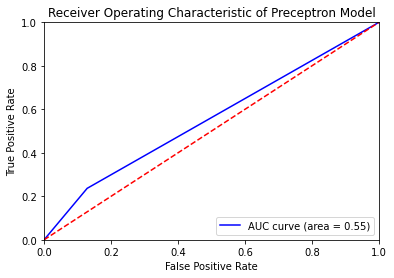

In [0]:
# ROC-AUC Curve for perceptron Model
fpr, tpr, thresholds_RF = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of Preceptron Model')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**2. Decision Tree**

In [0]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#Predict the response for test dataset
clf2.fit(X_train_std,y_train)
#Predict the response for test dataset
y_pred = clf2.predict(X_test_std)
#feature_importances
df = pd.DataFrame(data = clf2.feature_importances_, index=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'], columns=['importance'])
feature_importances = df.sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.518903
NumOfProducts,0.304603
IsActiveMember,0.139671
Balance,0.028286
EstimatedSalary,0.008536
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Tenure,0.000000
HasCrCard,0.000000


In [0]:
clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
feature_cols=df_nooutlier[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


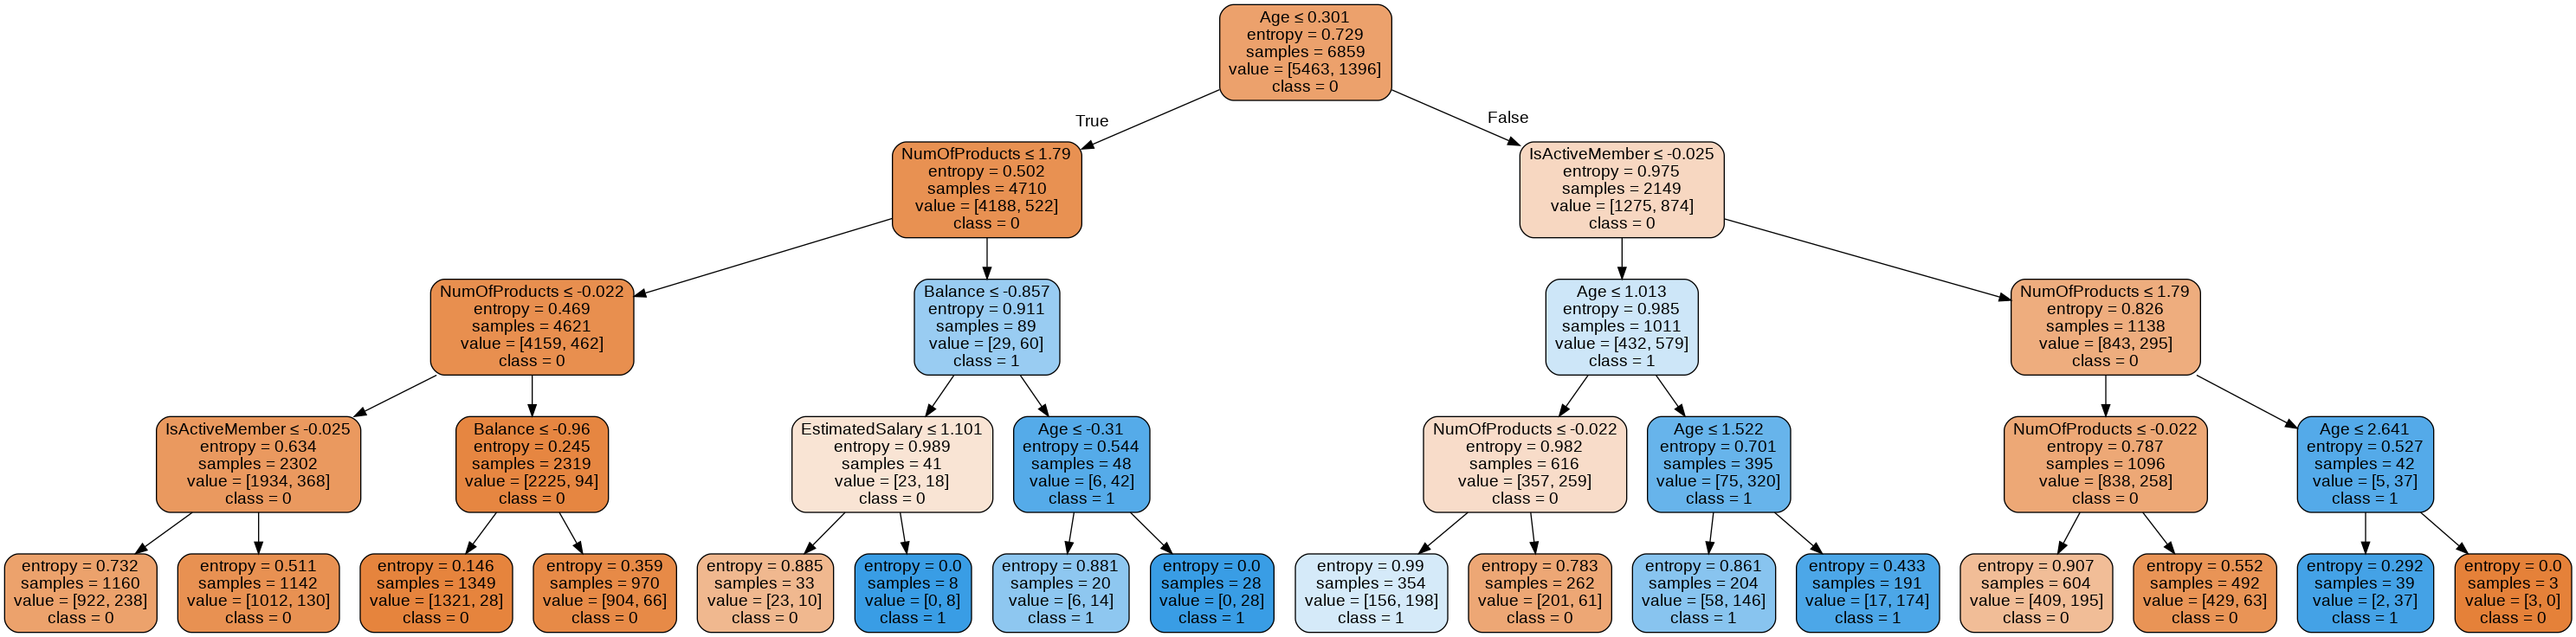

In [0]:
# Visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ChurnTree.png')
Image(graph.create_png())

In [0]:
# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2378
           1       0.65      0.40      0.50       562

    accuracy                           0.84      2940
   macro avg       0.76      0.67      0.70      2940
weighted avg       0.83      0.84      0.83      2940



In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2260  118]
 [ 338  224]]


In [0]:
#Accuracy
print("Accuracy of decision tree: ", round(clf2.score(X_test_std, y_test)*100,2),'%')

Accuracy of decision tree:  84.49 %


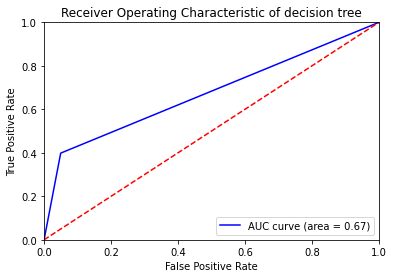

In [0]:
# ROC-AUC Curve for decision tree Model
fpr, tpr, thresholds_RF = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of decision tree')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**3. Random Forest** 

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_std,y_train)
y_pred=clf.predict(X_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


#feature_importances
df = pd.DataFrame(data = clf.feature_importances_, index=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'], columns=['importance'])
feature_importances = df.sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.240146
EstimatedSalary,0.150677
CreditScore,0.146196
Balance,0.141808
NumOfProducts,0.114349
Tenure,0.081681
IsActiveMember,0.047927
Geography,0.038114
HasCrCard,0.019906
Gender,0.019197


In [0]:
# Evaluation
print(classification_report(y_test,y_pred))

# Evaluation
print("Misclassified samples: %d" % (y_test != y_pred).sum())
misclassified_samples = (y_test != y_pred).sum()
print("Misclassification rate: ", (misclassified_samples / len(y_pred)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.75      0.44      0.56       562

    accuracy                           0.87      2940
   macro avg       0.82      0.70      0.74      2940
weighted avg       0.86      0.87      0.85      2940

Misclassified samples: 395
Misclassification rate:  0.13435374149659865


In [0]:
print(confusion_matrix(y_test, y_pred))

[[2297   81]
 [ 314  248]]


In [0]:
#Accuracy
print("Accuracy of random forest" ,round(clf.score(X_test_std, y_test)*100,2),'%')

Accuracy of random forest 86.56 %


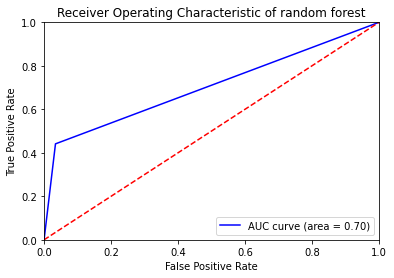

In [0]:
# ROC-AUC Curve for random forest Model
fpr, tpr, thresholds_RF = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of random forest')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**4. Neural Network**

In [0]:
# Matt deep neural network

%tensorflow_version 1.x
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
model = models.Sequential()
model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train_std,y_train,epochs = 10, batch_size = 20)

from sklearn.metrics import accuracy_score
print("Accuracy of DNNs:", round(accuracy_score(y_test,y_pred)*100,2),'%')
#model.add(Dense(10, input_dim=))

TensorFlow 1.x selected.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6859 samples
Epoch 1/10
6859/6859 [==============================] - 3s 369us/sample - loss: 0.5370 - acc: 0.7489
Epoch 2/10
6859/6859 [==============================] - 1s 107us/sample - loss: 0.4171 - acc: 0.8242
Epoch 3/10
6859/6859 [==============================] - 1s 108us/sample - loss: 0.3973 - acc: 0.8355
Epoch 4/10
6859/6859 [==============================] - 1s 106us/sample - loss: 0.3808 - acc: 0.8424
Epoch 5/10
6859/6859 [==============================] - 1s 106us/sample - loss: 0.3677 - acc: 0.8469
Epoch 6/10
6859/6859 [==============================] - 1s 113us/sample - loss: 0.3605 - acc: 0.8479
Epoch 7/10
6859/6859 [==============================] - 1s 108us/sample - loss: 0.3545 - acc: 0.8522
Epoch 8/10
6859/6859 [==============================] - 1s 106us/sample

In [0]:
test_loss, test_acc = model.evaluate(X_test_std, y_test)
print("Test Accuracy: %.2f" % test_acc)

2940/2940 [==============================] - 0s 46us/sample - loss: 0.3590 - acc: 0.8544
Test Accuracy: 0.85


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.75      0.44      0.56       562

    accuracy                           0.87      2940
   macro avg       0.82      0.70      0.74      2940
weighted avg       0.86      0.87      0.85      2940



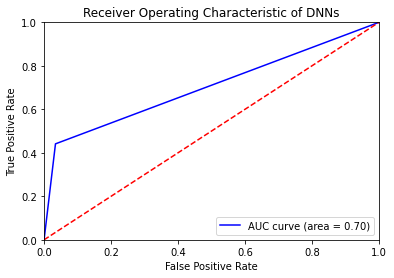

In [0]:
# ROC-AUC Curve for neural networks Model
fpr, tpr, thresholds_RF = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of DNNs')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**5. Logistic Regression**

In [0]:
#Predict function
# Prediction Function to fit and make predictions
def predct_func(classification_models, features, comparison):
    ''' Here we are going to fit our train data by passing 
        to the funtion predct_func and predict our X_test 
        data which is our new test cases here and it will result 
        out classification-report and all the error metrics of the
        particular model used here.
    ''' 
    # Lets fit the model first
    classification_models.fit(features, comparison)
    # Predict new test cases
    predicted_vals = classification_models.predict(X_test)
    # Lets apply K-Fold Croos Validatiion CV=10
    KVC = cross_val_score(estimator=classification_models, X=features, y=comparison,cv=10)
    KFoldCross_Accuracies = KVC.mean()
    print('K Fold Crossvalidation Accuracy------->', KFoldCross_Accuracies)
    print()
    # Generates the classification report of the model
    print("************Classification Report*************")
    print()
    class_report = classification_report(y_test,predicted_vals)
    print(class_report)
    # Generate the Confusion Matrix of the Model
    print("************Confusion Matrix*******************")
    print()
    CM = confusion_matrix(y_test, predicted_vals)
    print(CM)

  

In [0]:
# Define another function for Evaluation of out models
def eval_model(actual_vals, prediction_vals):
    ''' Function for evaluation of error metrics
        generates confusion matrix and results out
        False Positive Rate, False Negative Rate, 
        Sensitivity/TruePositiveRate/Recall & 
        specificity/TrueNegativeRate of models
    '''
    
    CM = pd.crosstab(actual_vals, prediction_vals)
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    print()
    
    # Error Metrics of the model algorithms
    print("<---------------ERROR METRICS-------------->")
    print()
    # False Negative Rate
    print("False Negative Rate-------------->",  (FN*100)/(FN+TP))
    print()
    # False Positive Rate
    print("False Positive Rate-------------->",  (FP*100)/(FP+TN))
    print()
    # Sensitivity
    print("Sensitivity/TPR/Recall----------->",  (TP*100)/(TP+FN))
    print()
    # Specificity
    print("Specificity/TNR------------------>",  (TN*100)/(TN+FP))


In [0]:
# Lets Develop Logistic Regression Model
LR_Model = LogisticRegression()
predct_func(LR_Model, X_train_std,y_train)

K Fold Crossvalidation Accuracy-------> 0.8174661105318041

************Classification Report*************

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2378
           1       0.19      1.00      0.32       562

    accuracy                           0.19      2940
   macro avg       0.60      0.50      0.16      2940
weighted avg       0.85      0.19      0.06      2940

************Confusion Matrix*******************

[[   2 2376]
 [   0  562]]


In [0]:
# Predict New Test Cases
LR_Predictions = LR_Model.predict(X_test_std)

# evaluate Error Metrics For Logistic Regression Model
eval_model(y_test, LR_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 78.64768683274022

False Positive Rate--------------> 2.733389402859546

Sensitivity/TPR/Recall-----------> 21.352313167259787

Specificity/TNR------------------> 97.26661059714046


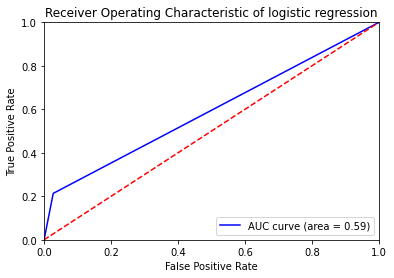

In [0]:
# ROC-AUC Curve for Logistic Regression Model
fpr, tpr, thresholds_RF = roc_curve(y_test, LR_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of logistic regression')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**6. Naive Bayes**

In [0]:
# Develop Naive Bayes Model
NB_Model  = GaussianNB()
predct_func(NB_Model, X_train_std,y_train)

K Fold Crossvalidation Accuracy-------> 0.8221304079504586

************Classification Report*************

              precision    recall  f1-score   support

           0       0.77      0.60      0.68      2378
           1       0.13      0.25      0.17       562

    accuracy                           0.54      2940
   macro avg       0.45      0.43      0.42      2940
weighted avg       0.65      0.54      0.58      2940

************Confusion Matrix*******************

[[1435  943]
 [ 421  141]]


In [0]:
# Predict new test cases
NB_Predictions = NB_Model.predict(X_test_std)

# evaluate Error Metrics For Naive Bayes Model
eval_model(y_test, NB_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 75.44483985765125

False Positive Rate--------------> 3.027754415475189

Sensitivity/TPR/Recall-----------> 24.555160142348754

Specificity/TNR------------------> 96.97224558452481


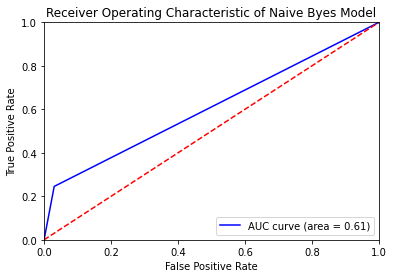

In [0]:
# ROC-AUC Curve for Naive Bayes Model
fpr, tpr, thresholds_RF = roc_curve(y_test, NB_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of Naive Byes Model')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**7. K-Nearest Neighbors**

In [0]:
# K-Nearset Neighbor
# Import Library
from sklearn.neighbors import KNeighborsClassifier
# Training at certain k
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_std,y_train)
neigh
# Predicting
yhat = neigh.predict(X_test_std)
yhat[0:5]
# Accuracy Evaluation
from sklearn import metrics
print("Accuracy of KNN (K=4): ", round(metrics.accuracy_score(y_test, neigh.predict(X_test_std))*100,2),'%')

Accuracy of KNN (K=4):  83.1 %


In [0]:
# Find the best K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_std,y_train)
    yhat=neigh.predict(X_test_std)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.79557823, 0.82687075, 0.8244898 , 0.83095238, 0.82823129,
       0.83095238, 0.83231293, 0.83435374, 0.83435374])

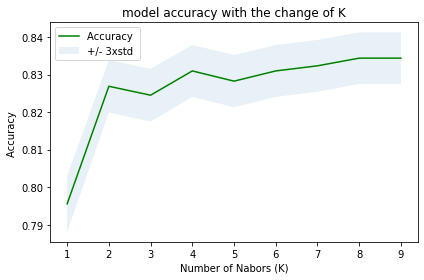

In [0]:
# Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.title('model accuracy with the change of K')
plt.tight_layout()
plt.show()

In [0]:
# the best k=8
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_std,y_train)
neigh
# Predicting
yhat = neigh.predict(X_test_std)
yhat[0:5]
# Accuracy Evaluation
from sklearn import metrics
print("Accuracy of KNN (K=8): ", round(metrics.accuracy_score(y_test, neigh.predict(X_test_std))*100,2),'%')

Accuracy of KNN (K=8):  83.44 %


**8. Support Vector Machine**

In [0]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
# SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train_std,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
print(classification_report(y_train,  SVM_RBF.predict(X_train_std)))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5463
           1       0.92      0.71      0.80      1396

    accuracy                           0.93      6859
   macro avg       0.92      0.85      0.88      6859
weighted avg       0.93      0.93      0.92      6859



In [0]:
# SVM with Poly Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train_std,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
print(classification_report(y_train,  SVM_POL.predict(X_train_std)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5463
           1       0.81      0.11      0.19      1396

    accuracy                           0.81      6859
   macro avg       0.81      0.55      0.54      6859
weighted avg       0.81      0.81      0.75      6859



In [0]:
# Test model prediction accuracy on test data
# SVM with RBF Kernel
print(classification_report(y_test,  SVM_RBF.predict(X_test_std)))
# SVM with Pol Kernel
print(classification_report(y_test,  SVM_POL.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2378
           1       0.58      0.44      0.50       562

    accuracy                           0.83      2940
   macro avg       0.73      0.68      0.70      2940
weighted avg       0.82      0.83      0.82      2940

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2378
           1       0.87      0.12      0.20       562

    accuracy                           0.83      2940
   macro avg       0.85      0.56      0.55      2940
weighted avg       0.83      0.83      0.77      2940



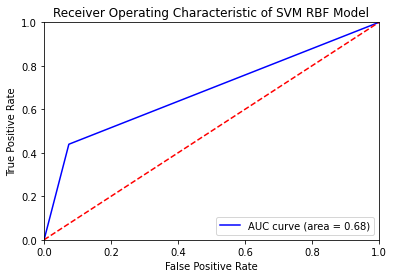

In [0]:
# ROC-AUC Curve for SVM RBF Model
fpr, tpr, thresholds_RF = roc_curve(y_test,  SVM_RBF.predict(X_test_std))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of SVM RBF Model')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

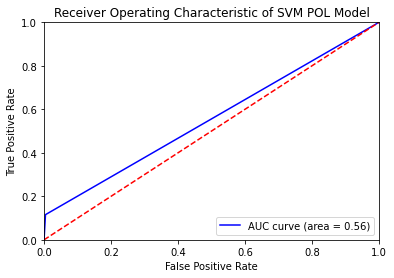

In [0]:
# ROC-AUC Curve for SVM Poly Model
fpr, tpr, thresholds_RF = roc_curve(y_test,  SVM_POL.predict(X_test_std))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of SVM POL Model')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**9. Extreme Gradient Boost Model**

In [0]:
# Extreme Gradient Boost Classifier

XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [0]:
# Classification Report
print(classification_report(y_train,  XGB.predict(X_train_std)))



              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5463
           1       0.83      0.50      0.62      1396

    accuracy                           0.88      6859
   macro avg       0.86      0.73      0.77      6859
weighted avg       0.87      0.88      0.86      6859



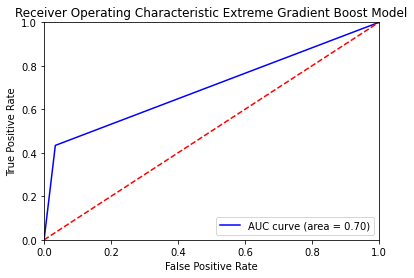

In [0]:
# ROC-AUC Curve for Extreme Gradient Boost Model
fpr, tpr, thresholds_RF = roc_curve(y_test,  XGB.predict(X_test_std))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Extreme Gradient Boost Model')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Report accuracy of different mdoels**

In [0]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Accuracy'])
t.add_row(['Preceptron Model',round(accuracy_score(y_test,y_pred),4)])
t.add_row(['Decision Tree',round(clf2.score(X_test, y_test),4)])
t.add_row(['random forest',round(clf.score(X_test, y_test),4)])
t.add_row(['DNNs', round(accuracy_score(y_test,y_pred),4)])
t.add_row(['KNN (best K=8)', round(metrics.accuracy_score(y_test, neigh.predict(X_test_std)),4)])
t.add_row(['logistic regression',round(accuracy_score(y_test, LR_Predictions),4)])
t.add_row(['Naive Bayes',round(accuracy_score(y_test, NB_Predictions),4)])
t.add_row(['SVM_RBF Model',round(accuracy_score(y_test,SVM_RBF.predict(X_test_std)),4)])
t.add_row(['SVM_POL Model',round(accuracy_score(y_test,SVM_POL.predict(X_test_std)),4)])
t.add_row(['Extreme Gradient Boost',round(accuracy_score(y_test,XGB.predict(X_test_std)),4)])
print(t)

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|    Preceptron Model    |  0.8656  |
|     Decision Tree      |  0.8088  |
|     random forest      |  0.4228  |
|          DNNs          |  0.8656  |
|     KNN (best K=8)     |  0.8344  |
|  logistic regression   |  0.8276  |
|      Naive Bayes       |  0.8313  |
|     SVM_RBF Model      |  0.833   |
|     SVM_POL Model      |  0.8276  |
| Extreme Gradient Boost |  0.8646  |
+------------------------+----------+


**Plot multiple ROC Curves in one plot**

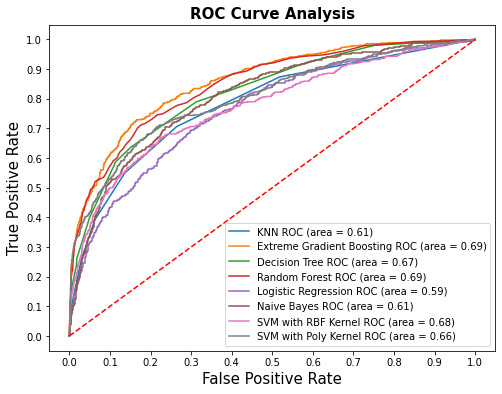

In [0]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors = 8),
},
{
    'label': 'Extreme Gradient Boosting',
    'model': XGBClassifier(),
},
{
    'label':'Decision Tree',
    'model':DecisionTreeClassifier(criterion="entropy", max_depth = 4),
},
{
    'label':'Random Forest',
    'model':RandomForestClassifier(n_estimators=100),
 
},
{
    'label':'Logistic Regression',
    'model':LogisticRegression(),
},
{
    'label':'Naive Bayes',
    'model':GaussianNB(),
},
{
    'label':'SVM with RBF Kernel',
    'model':SVC(C=100, gamma=0.1, kernel='rbf', probability=True),
},
{
    'label':'SVM with Poly Kernel',
    'model':SVC(C=100, gamma=0.1, kernel='poly', probability=True),
},
]
# Below for loop iterates through your models list
fig = plt.figure(figsize=(8,6))
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_std, y_train) # train the model
    y_pred=model.predict(X_test_std) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_std)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_std))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(loc='lower right')
plt.show()   # Display

Proportion of retained and exited customers in the training dataset

0    5463
1    1396
Name: Exited, dtype: int64
There are 20% of the customers who have churned and 80% of the customers who are retained


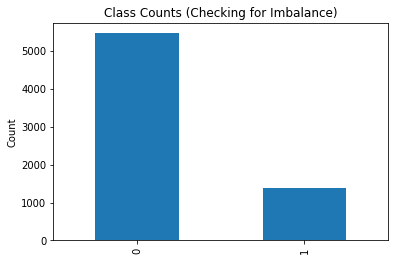

In [0]:
# Looking at the proportions of customers exited and retained in the training sample
print(y_train.value_counts())
y_train.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')

print("There are 20% of the customers who have churned and 80% of the customers who are retained")

Clearly, there is a target class imbalance problem in this scenario

**Random Oversampling:** 
Random oversampling involves randomly selecting examples from the minority 
class (exited = 1 in this case), with replacement, and adding them to training sample.

1    5463
0    5463
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Class Counts (Checking for Imbalance)')

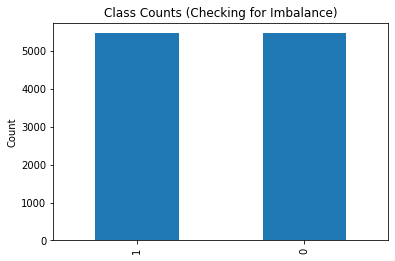

In [0]:
 # Random oversampling to rectify the target class imbalance problem

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
X_train_sampled, y_train_sampled = sampler.fit_sample(X_train, y_train)
y_train_sampled = pd.Series(y_train_sampled)
print(y_train_sampled.value_counts())

y_train_sampled.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')

In [0]:
X_train_sampled



array([[556, 0, 0, ..., 1, 0, 175149.2],
       [661, 2, 0, ..., 1, 0, 69586.27],
       [764, 0, 1, ..., 0, 0, 134878.34],
       ...,
       [720, 2, 0, ..., 1, 1, 160849.43],
       [724, 0, 1, ..., 1, 0, 134889.95],
       [798, 2, 0, ..., 0, 0, 119071.56]], dtype=object)

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_sampled,y_train_sampled)
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

**Evaluation**

In [0]:
# Evaluation
print(classification_report(y_test,y_pred))

# Evaluation
print("Misclassified samples: %d" % (y_test != y_pred).sum())
misclassified_samples = (y_test != y_pred).sum()
print("Misclassification rate: ", (misclassified_samples / len(y_pred)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2378
           1       0.65      0.49      0.56       562

    accuracy                           0.85      2940
   macro avg       0.77      0.71      0.74      2940
weighted avg       0.84      0.85      0.84      2940

Misclassified samples: 434
Misclassification rate:  0.14761904761904762


In [0]:
print(confusion_matrix(y_test, y_pred))

[[2230  148]
 [ 286  276]]


In [0]:
#Accuracy
print("Accuracy of random forest" ,round(clf.score(X_test, y_test)*100,2),'%')

Accuracy of random forest 85.24 %


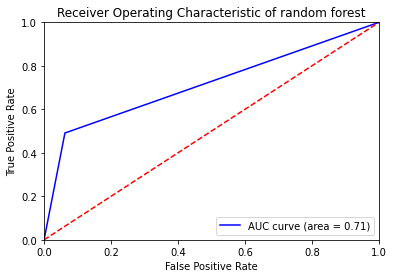

In [0]:
# ROC-AUC Curve for random forest Model
fpr, tpr, thresholds_RF = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic of random forest')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Summary**

According to the accuracy of models, the best performance model is random forest and the worst performance model is Naive Bayes.

In [0]:
# Changing the variable types for test and predicted data 
y_pred = pd.DataFrame(y_pred)

y_test = pd.DataFrame(y_test)

X_test = pd.DataFrame(X_test)

y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)



In [0]:
# Reassigning column names
X_test.columns = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
y_test.columns = ["exited_actuals"]
y_pred.columns = ["exited_predicted"]

In [0]:
# concatenating as a dataframe
dataForInsights = pd.concat((X_test,y_pred,y_test),axis = 1)
print(dataForInsights.head())
print(dataForInsights.shape)


  CreditScore Geography  ... exited_predicted exited_actuals
0         579         2  ...                0              0
1         646         0  ...                0              0
2         721         2  ...                0              0
3         773         1  ...                0              0
4         683         2  ...                1              0

[5 rows x 12 columns]
(2940, 12)


In [0]:
insightData = dataForInsights.loc[dataForInsights['exited_predicted'] == 1]
insightData.mean()

CreditScore            650.370283
Geography                0.799528
Gender                   0.474057
Age                     47.662736
Tenure                   4.853774
Balance              94483.532830
NumOfProducts            1.408019
HasCrCard                0.750000
IsActiveMember           0.238208
EstimatedSalary     101047.380943
exited_predicted         1.000000
exited_actuals           0.650943
dtype: float64